First, we install the Ocean SDK (D-Wave software).

In [1]:
!pip install dwave-ocean-sdk networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

Now we need to set up the environment (you can press 'enter' to use the default options).

In [2]:
!dwave setup

Optionally install non-open-source packages and configure your environment.

Do you want to select non-open-source packages to install (y/n)? [y]: y

D-Wave Problem Inspector
This tool visualizes problems submitted to the quantum computer and the results returned.
This package is available under the D-Wave EULA license.
The terms of the license are available online: https://docs.ocean.dwavesys.com/eula
Install (y/n)? [y]: 
Installing: D-Wave Problem Inspector

D-Wave Drivers
These drivers enable some automated performance-tuning features.
This package is available under the D-Wave EULA license.
The terms of the license are available online: https://docs.ocean.dwavesys.com/eula
Install (y/n)? [y]: 
Installing: D-Wave Drivers

Creating the D-Wave configuration file.
Using the simplified configuration flow.
Try 'dwave config create --full' for more options.

Creating new configuration file: /root/.config/dwave/dwave.conf
Profile [defaults]: 
Updating existing profile: defaults
Authenticat

We import the necessary libraries.

In [3]:
from dimod import Binary, ExactSolver
from networkx import Graph, draw
from dwave.samplers import SimulatedAnnealingSampler, SteepestDescentSampler
from dwave.system import DWaveSampler, EmbeddingComposite

We build a function to construct the QUBO model from the graph.


In [16]:
def obtain_QUBO(G):
  nvars = len(G.nodes())
  var = [Binary(f'v{i}') for i in range (0,nvars)]
  qubo = -sum([(var[i]-var[j])**2 for i,j in G.edges()])
  return qubo

We define a function to obtain the sampler that will attempt to solve the problem.

In [17]:
def obtain_sampler():
  return ExactSolver()
  #return SimulatedAnnealingSampler()
  #return SteepestDescentSampler()
  #return EmbeddingComposite(DWaveSampler())

We will use the example graph.

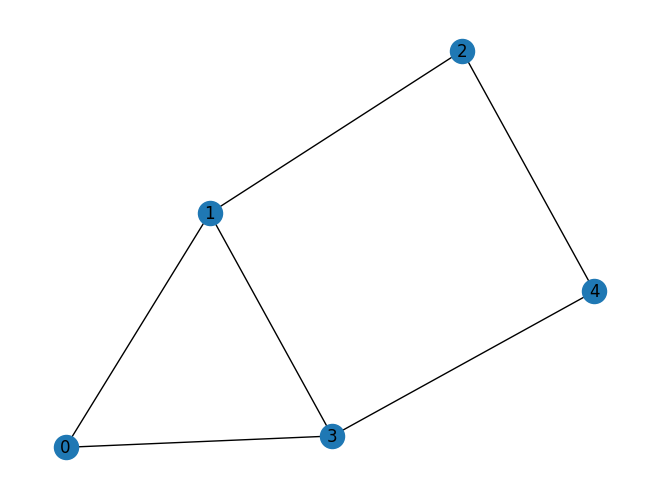

In [6]:
G = Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0,1),(0,3),(1,2),(1,3),(2,4),(3,4)])
draw(G, with_labels=True)

Let's see what the QUBO looks like for this graph:

In [18]:
qubo = obtain_QUBO(G)
qubo

BinaryQuadraticModel({'v0': -2.0, 'v1': -3.0, 'v3': -3.0, 'v2': -2.0, 'v4': -2.0}, {('v1', 'v0'): 2.0, ('v3', 'v0'): 2.0, ('v3', 'v1'): 2.0, ('v2', 'v1'): 2.0, ('v4', 'v3'): 2.0, ('v4', 'v2'): 2.0}, -0.0, 'BINARY')

Now we calculate the solution.

In [19]:
sampler = obtain_sampler()
result = sampler.sample(qubo, num_reads=10)
print(result)

   v0 v1 v2 v3 v4 energy num_oc.
8   0  0  1  1  0   -5.0       1
9   1  0  1  1  0   -5.0       1
28  0  1  0  0  1   -5.0       1
29  1  1  0  0  1   -5.0       1
4   0  1  0  1  0   -4.0       1
11  0  1  1  1  0   -4.0       1
14  1  0  1  0  0   -4.0       1
17  1  0  1  0  1   -4.0       1
27  0  1  0  1  1   -4.0       1
30  1  0  0  0  1   -4.0       1
2   1  1  0  0  0   -3.0       1
3   0  1  0  0  0   -3.0       1
6   1  0  0  1  0   -3.0       1
7   0  0  0  1  0   -3.0       1
12  0  1  1  0  0   -3.0       1
13  1  1  1  0  0   -3.0       1
18  1  1  1  0  1   -3.0       1
19  0  1  1  0  1   -3.0       1
22  1  0  1  1  1   -3.0       1
23  0  0  1  1  1   -3.0       1
24  0  0  0  1  1   -3.0       1
25  1  0  0  1  1   -3.0       1
1   1  0  0  0  0   -2.0       1
5   1  1  0  1  0   -2.0       1
10  1  1  1  1  0   -2.0       1
15  0  0  1  0  0   -2.0       1
16  0  0  1  0  1   -2.0       1
20  0  1  1  1  1   -2.0       1
26  1  1  0  1  1   -2.0       1
31  0  0  

<ipython-input-19-8a0d83c8786b>:2: SamplerUnknownArgWarning: Ignoring unknown kwarg: 'num_reads'
  result = sampler.sample(qubo, num_reads=10)


In [ ]:
!dwave config create